实验一、e-greedy同质群体调整学习率(learning_rate)，观察其对结果的影响


In [1]:
# 没有未来预期的qlearning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
font = {
        'size'   : 14,
        }


In [3]:
class MarjorityGame():

    def __init__(self, N, T):

        self.N = N
        self.T = T

        self.pc_pro = []
        self.n_list=[]
        
    def step(self, action_N):
        nc = 1 - sum(action_N)/self.N
        if nc >= self.T:
            round_r=1.
            n=1
        else:
            round_r=-1.
            n=0
        self.pc_pro.append(nc )
        self.n_list.append(n)
        return round_r,n

    def reset(self):
        self.pc_pro = []
        self.n_list=[]

class Agent():  # 当前行动 self.action;当前收益 self.reward;累积收益cul_reward;
    # 历史收益reward——history；历史行动 his_action
    # q表；历史q表q0_his;q1_his

    def __init__(self, learning_rate, **kwargs):

        self.learning_rate = learning_rate
        self.action_space = [0, 1]
        self.q = np.array([0., 0.])

        self.action = 0
        self.reward = 0
        self.cul_rewards = 0

        self.reward_history = []
        self.action_history = []

        self.policy = kwargs['policy']
        self.epsilon = kwargs['epsilon'] if self.policy == 'e_greedy' else 0
        self.temperature = kwargs['temp'] if self.policy == 'boltzman' else 0

        self.q0_his = [0.]
        self.q1_his = [0.]


    def choose_action(self):
        if self.policy == 'e_greedy':
            if np.random.rand() < self.epsilon or ((self.q == 0).any()):

                action = np.random.choice(self.action_space, p=[0.5, 0.5])
            else:
                if abs(self.q[0]-self.q[1])<1e-7:
                     action = np.random.choice(self.action_space, p=[0.5, 0.5])
                else:
                    action = np.argmax(self.q)
        self.action=action
        return action

    def RL(self):
        self.action_history.append(self.action)
        self.reward_history.append(self.reward)
        self.q[self.action] += self.learning_rate * (self.reward - self.q[self.action])
        self.q[self.action]=round(self.q[self.action],6)
        self.q0_his.append(self.q[0])
        self.q1_his.append(self.q[1])
    def reset(self):
        self.q = np.array([0., 0.])

        self.action = 0
        self.reward = 0


        self.reward_history = []
        self.action_history = []



In [4]:
np.random.seed(1234)

colors = ['r--', 'g-', 'b-.', 'y:']

cost = 0.2
total_round =6000
N = 60
T= 0.7
r_list=[]
env = MarjorityGame(N, T )
env.reset()

Agent_N = [Agent(learning_rate=0.2,
                 policy='e_greedy',
                 epsilon=0.03)
           for _ in range(N)]

for _ in range(total_round):
    action_N = [agent.choose_action() for agent in Agent_N]
    round_r,n = env.step(action_N)
    r=0
    for agent in Agent_N:
        if n>0:
            if agent.action == 0 :
                agent.reward = round_r - cost
            else:
                 agent.reward = round_r
        else:
                agent.reward = round_r
        r+=agent.reward
        agent.RL()
    r_list.append(r/N)

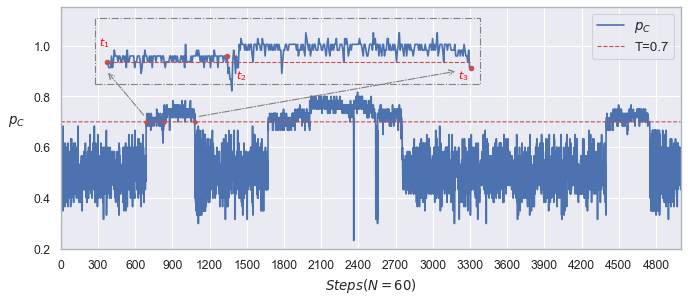

In [5]:
sns.set()
fig,ax0= plt.subplots(1, 1, figsize=(10,4), dpi=80)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12,
        }
import matplotlib
import matplotlib.patches as patches

times=5000

ax0.plot(list(range(times)), env.pc_pro[:times],label='$p_C$')#color='#1f77b4'
ax0.plot(list(range(times)), [T] * int(times), 'r--',linewidth=1,label='T=0.7')
ax0.set_ylim(0.2,1.15)
ax0.set_xlim(-0.1,times)
ax0.set_xlabel('$Steps(N=60)$',font)
ax0.set_ylabel('$p_C$',font,rotation=0,labelpad=15)
ax0.set_xticks(list(range(times))[::300])

ax0.plot(1081,0.7,'ro',markersize=3)
ax0.plot(689,0.7,'ro',markersize=3)
ax0.plot(832,0.7,'ro',markersize=3)



plt.legend(fontsize=12,loc=1)
t1=689
t3=1082
t2=819
left, bottom, width, height = 0.16, 0.61, 0.5, 0.2
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(list(range(t3-t1)), env.pc_pro[t1:t3])
ax1.plot(list(range(t3-t1)), [T] * int(t3-t1), 'r--',linewidth=1)

ax1.plot(0, env.pc_pro[t1],'ro',markersize=4)
ax1.plot(t2-t1, env.pc_pro[819],'ro',markersize=4)
ax1.plot(t3-t1,env.pc_pro[1081],'ro',markersize=4)
ax1.axis('off')
''' 
ax1.spines['right'].set_linestyle('--')
ax1.spines['bottom'].set_linestyle('--')
ax1.spines['top'].set_linestyle('--')
ax1.spines['left'].set_linestyle('--')
ax1.spines['right'].set_color('#ced4da')
ax1.spines['bottom'].set_color('#ced4da')
ax1.spines['top'].set_color('#ced4da')
ax1.spines['left'].set_color('#ced4da')
'''

ax0.text(310,1.0,'$t_1$',color='red', fontsize=10)
ax0.text(1410,0.87,'$t_2$',color='red', fontsize=10)
ax0.text(3200,0.87,'$t_3$',color='red', fontsize=10)
ax0.annotate('', xy=(370, 0.9), xytext=(680,0.72), arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))#1f77b4
ax0.annotate('', xy=(3200, 0.9), xytext=(1100,0.72), arrowprops=dict(arrowstyle="->", color='grey',linestyle='-.', hatch='*'))
ax0.spines['right'].set_color('#adb5bd')
ax0.spines['bottom'].set_color('#adb5bd')
ax0.spines['left'].set_color('#adb5bd')
ax0.spines['top'].set_color('#adb5bd')
ax0.add_patch(patches.Rectangle((280, 0.85), 3100, 0.26,linestyle='-.',edgecolor = 'grey',fill=False ) )
plt.savefig('dynamics_state_dependent.pdf')
plt.show()

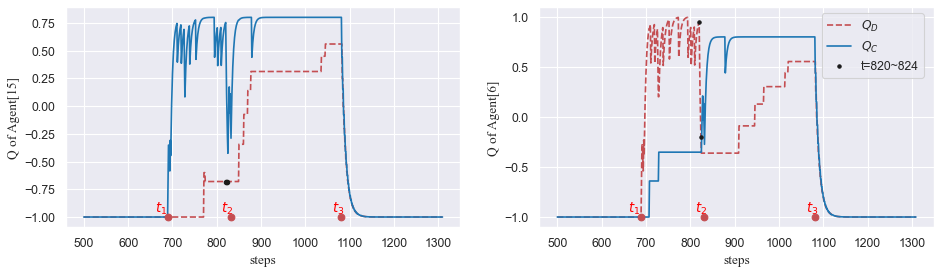

In [6]:
fig= plt.subplots(1, 1, figsize=(14,8), dpi=80)


ax1 = plt.subplot(2,2,3)
steps=1310
agent=Agent_N[15]

ax1.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
ax1.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
#plt.plot(abs(np.array(agent.q0_his[:steps])-np.array(agent.q1_his[:steps])),'g-.',linewidth=1,label='$\Delta Q$') 
ax1.set_xticks(list(range(810))[::100])
ax1.set_xticklabels(list(range(500,1310))[::100])

ax1.plot(689-500,-1,'ro')
ax1.plot(1081-500,-1,'ro')
ax1.plot(832-500,-1,'ro')
ax1.text(160,-0.95,'$t_1$',color='red')
ax1.text(310,-0.95,'$t_2$',color='red')
ax1.text(560,-0.95,'$t_3$',color='red')
ax1.set_xlabel('steps',font)
ax1.set_ylabel('Q of Agent[15]',font)
ax1.plot(820-500,agent.q1_his[820],'ko',markersize=4)
ax1.plot(824-500,agent.q1_his[824],'ko',markersize=4,label='t=820~824')
#ax1.legend(bbox_to_anchor=(0.65,0.9))

ax2 = plt.subplot(2,2,4)
agent=Agent_N[6]
ax2.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
ax2.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
ax2.set_xticks(list(range(810))[::100])
ax2.set_xticklabels(list(range(500,1310))[::100])
ax2.plot(689-500,-1,'ro')
ax2.plot(1081-500,-1,'ro')
ax2.plot(832-500,-1,'ro')
ax2.text(160,-0.95,'$t_1$',color='red')
ax2.text(310,-0.95,'$t_2$',color='red')
ax2.text(560,-0.95,'$t_3$',color='red')
ax2.plot(820-500,agent.q1_his[820],'ko',markersize=3)
ax2.plot(824-500,agent.q1_his[824],'ko',markersize=3,label='t=820~824')

ax2.set_xlabel('steps',font)
ax2.set_ylabel('Q of Agent[6]',font)

ax2.legend(bbox_to_anchor=(0.7,1))
plt.show()


In [7]:
pc_df=pd.DataFrame(env.pc_pro)
pc_df.to_csv('env_pc1.csv',header=None)


In [8]:
pc_df1=pc_df[:600]
pc_df1[(pc_df1>0.435) & (pc_df1<0.565)].count()/600

0    0.64
dtype: float64

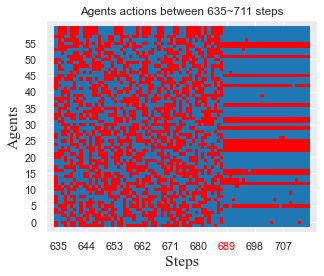

In [12]:
plt.figure(figsize=(5,4), dpi=70)
sns.set()
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 16,
        }
action_dict={0:'#1f77b4',1:'red'}

for i in range(N):
    for j in range(80):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[635+j]],marker='s',s=80)

plt.xlabel('Steps',font)
plt.ylabel('Agents',font)
plt.xticks(list(range(80))[::9],list(range(635,711))[::9])
plt.yticks(list(range(N))[::5])
plt.title('Agents actions between 635~711 steps')
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [6]:
        tl.set_color('red')
plt.savefig('cellular.pdf')
plt.show()

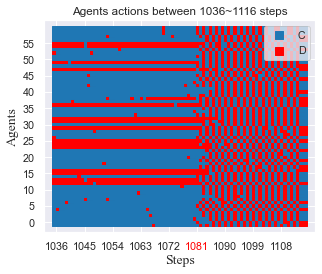

In [257]:
plt.figure(figsize=(5,4), dpi=70)
sns.set()
action_dict={0:'#1f77b4',1:'red'}

for i in range(N):
    for j in range(80):
        if Agent_N[i].action_history[1036+j]==0:
            s1=plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1036+j]],marker='s',s=80)
        else:
            s2=plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1036+j]],marker='s',s=80)

plt.xlabel('Steps',font)
plt.ylabel('Agents',font)
plt.xticks(list(range(80))[::9],list(range(1036,1116))[::9])
plt.yticks(list(range(N))[::5])
plt.title('Agents actions between 1036~1116 steps')
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [5]:
        tl.set_color('red')
plt.savefig('4cellular.pdf')
plt.legend((s1,s2),('C','D') ,loc = 'best')
plt.show()

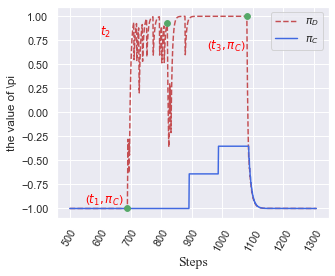

In [43]:
plt.figure(figsize=(5,4), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
sns.set()
ax1=plt.subplot(1,1,1)
agent=Agent_N[10]
steps=1310
t1=689
t2=819
t3=1081
ax1.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
ax1.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
ax1.set_xticks(list(range(steps-500))[::100])
ax1.set_xticklabels(list(range(500,steps))[::100],rotation=60)
ax1.plot(t1-500,agent.q0_his[t1],'ro')#color='#52b788',marker='o')
ax1.plot(t2-500,agent.q0_his[t2],'ro')#color='#52b788',marker='o')
ax1.plot(t3-500,agent.q0_his[t3],'ro')#color='#52b788',marker='o')
#ax1.plot(820,agent.q1_his[820],'go',markersize=6,label='$820\sim 825$')
ax1.set_ylabel('the value of \pi')
ax1.text(550-500,-0.95,'($t_1,\pi_C$)',color='red')
ax1.text(800-500,0.8,'$t_2$',color='red')
ax1.text(950-500,0.65,'($t_3,\pi_C$)',color='red')
ax1.set_xlabel('Steps',font)
ax1.annotate('the step increase \n due to exploration', xy=(850-500,-0.3), xytext=(780-500, -0.96),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))


plt.legend()
plt.savefig('agent10.pdf')

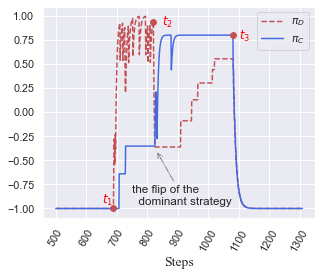

In [82]:
plt.figure(figsize=(5,4), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
ax1=plt.subplot(1,1,1)
agent=Agent_N[6]
steps=1310
t1=689
t2=819
t3=1081
ax1.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
ax1.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
ax1.set_xticks(list(range(steps-500))[::100])
ax1.set_xticklabels(list(range(500,steps))[::100],rotation=60)
ax1.plot(689-500,agent.q1_his[t1],'ro')
ax1.plot(819-500,agent.q1_his[t2],'ro')
ax1.plot(1081-500,agent.q0_his[t3],'ro')
#ax1.plot(820,agent.q1_his[820],'go',markersize=6,label='$820\sim 825$')

ax1.text(650-500,-0.95,'$t_1$',color='red',)
ax1.text(850-500,0.9,'$t_2$',color='red')
ax1.text(1100-500,0.75,'$t_3$',color='red')
ax1.set_xlabel('Steps',font)
ax1.annotate('the flip of the \n  dominant strategy', xy=(830-500,-0.4), xytext=(750-500, -0.96),
              arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))

plt.legend()
plt.savefig('agent6.pdf')

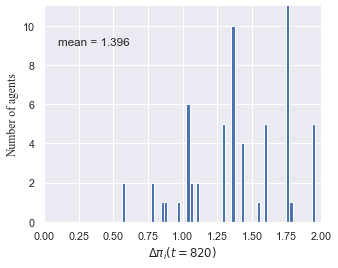

In [390]:

plt.figure(figsize=(5,4), dpi=70)
t=820
q_ls=[]
for agent in Agent_N:
    q_ls.append(abs(agent.q0_his[t]-agent.q1_his[t]))
    me=np.mean(np.array(q_ls)).round(3)

plt.hist(q_ls,bins=60,label='t={},\n mean={}'.format(t,me))
plt.xlim(0,2)
plt.ylim(0,11)
plt.text(0.1,9,'mean = {}'.format(me))
ax = plt.gca()  # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none')  # 将右边 边沿线颜色设置为空 其实就相当于抹掉这条边
ax.spines['top'].set_color('none')
plt.ylabel('Number of agents',font)
plt.xlabel('$\Delta \pi_i(t={})$'.format(t),font)
ax.spines['left'].set_position(('data', 0))
    
plt.tight_layout()
plt.savefig('deltaq_819.pdf')
plt.show()

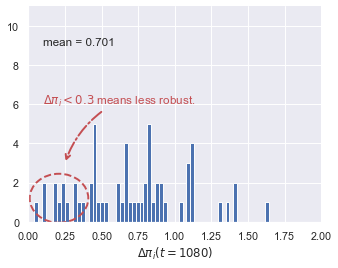

In [405]:
t=1080
plt.figure(figsize=(5,4), dpi=70)
from matplotlib.patches import Ellipse
q_ls=[]
for agent in Agent_N:
    q_ls.append(abs(agent.q0_his[t]-agent.q1_his[t]))
    me=np.mean(np.array(q_ls)).round(3)

plt.hist(q_ls,bins=60,label='t={},\n mean={}'.format(t,me))
plt.xlim(0,2)
plt.ylim(0,11)
plt.text(0.1,9,'mean = {}'.format(me))
ax = plt.gca()  # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none')  # 将右边 边沿线颜色设置为空 其实就相当于抹掉这条边
ax.spines['top'].set_color('none')
#plt.ylabel('Number of agents',font)
plt.xlabel('$\Delta \pi_i(t={})$'.format(t),font)
ax.spines['left'].set_position(('data', 0))
#画椭圆
ellipse = Ellipse(xy=(0.21,1.2), width=0.4,height=2.5,angle=0)    # 旋转角度（逆时针）
ax.add_patch(p=ellipse)    # 向子区添加形状
ellipse.set( ec='r',ls='--',lw=2,fill=False)
ax.annotate('$\Delta\pi_i <0.3$ means less robust.', xy=(0.25,3), xytext=(0.1, 6),color='r', fontsize=12,
              arrowprops=dict(arrowstyle="->", connectionstyle='arc3,rad=.2',color='r' ,linestyle='-.',lw=2))
plt.tight_layout()
plt.savefig('deltaq_1080.pdf')
plt.show()

### supplement information

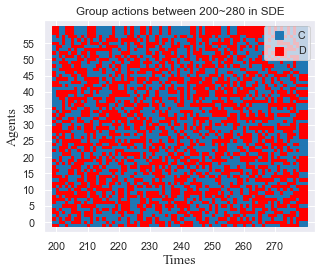

In [139]:
plt.figure(figsize=(5,4), dpi=70)
sns.set()
action_dict={0:'#1f77b4',1:'red'}

for i in range(N):
    for j in range(80):
        if Agent_N[i].action_history[200+j]==0:
            s1=plt.scatter(j,i,color='#1f77b4',marker='s',s=80)
        else:
            s2=plt.scatter(j,i,color='red',marker='s',s=80)

plt.xlabel('Times',font)
plt.ylabel('Agents',font)
plt.xticks(list(range(80))[::10],list(range(200,280))[::10])
plt.yticks(list(range(N))[::5])
plt.title('Group actions between 200~280 in SDE')

plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s1-cellular.pdf')
plt.legend((s1,s2),('C','D') ,loc = 'best')
plt.show()

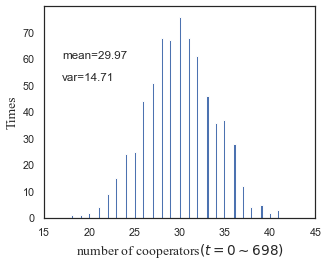

In [143]:
plt.figure(figsize=(5,4), dpi=70)
sns.set_style('white')
nd=np.array( env.pc_pro[:689])
nd=nd*N
mean=round(nd.mean(),2)
variance=round(nd.var(),2)
plt.hist(nd,bins=100)
plt.xlabel('number of cooperators$(t=0\sim 698)$',font)
plt.ylabel('Times',font)

plt.text(17,60, 'mean={}'.format(mean), fontsize=12)
plt.text(17,52, 'var={}'.format(variance), fontsize=12)
plt.xlim(15,45)
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s3-dis689.pdf')
plt.show()

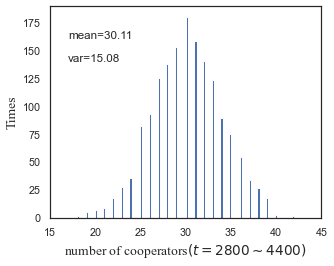

In [144]:
plt.figure(figsize=(5,4), dpi=70)

nd=np.array( env.pc_pro[2800:4400])
nd=nd*N
mean=round(nd.mean(),2)
variance=round(nd.var(),2)
plt.hist(nd,bins=100)
plt.xlabel('number of cooperators$(t=2800\sim 4400)$',font)
plt.ylabel('Times',font)

plt.text(17,160, 'mean={}'.format(mean), fontsize=12)
plt.text(17,140, 'var={}'.format(variance), fontsize=12)
plt.xlim(15,45)
plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s4-dis1080.pdf')
plt.show()

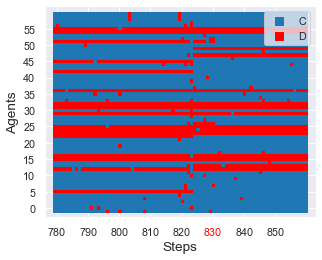

In [31]:
plt.figure(figsize=(5,4), dpi=70)
sns.set()
action_dict={0:'#1f77b4',1:'red'}

for i in range(N):
    for j in range(80):
        if Agent_N[i].action_history[780+j]==0:
            s1=plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[780+j]],marker='s',s=80)
        else:
            s2=plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[780+j]],marker='s',s=80)

plt.xlabel('Steps',font)
plt.ylabel('Agents',font)
plt.xticks(list(range(80))[::10],list(range(780,860))[::10])
plt.yticks(list(range(N))[::5])
#plt.title('Agents actions between 780~860 steps')
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [5]:
        tl.set_color('red')
plt.savefig('4cellular.pdf')
plt.legend((s1,s2),('C','D') ,loc = 'best')
plt.show()

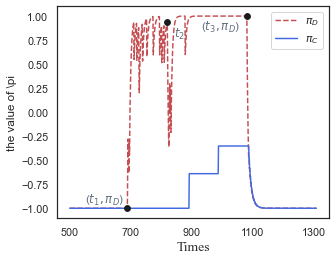

In [99]:
plt.figure(figsize=(5,4), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
sns.set_style('white')
ax1=plt.subplot(1,1,1)
agent=Agent_N[24]
steps=1310
t1=689
t2=819
t3=1081
ax1.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
ax1.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
ax1.set_xticks(list(range(steps-500))[::200])
ax1.set_xticklabels(list(range(500,steps))[::200])
ax1.plot(t1-500,agent.q1_his[t1],'ko')#color='#52b788',marker='o')
ax1.plot(t2-500,agent.q1_his[t2],'ko')#color='#52b788',marker='o')
ax1.plot(t3-500,agent.q1_his[t3],'ko')#color='#52b788',marker='o')

ax1.set_ylabel('the value of \pi')
ax1.text(550-500,-0.95,'($t_1,\pi_D$)',color='#637081')
ax1.text(843-500,0.78,'$t_2$',color='#637081')
ax1.text(930-500,0.85,'($t_3,\pi_D$)',color='#637081')
ax1.set_xlabel('Times',font)
#ax1.annotate('the step increase \n due to exploration', xy=(850-500,-0.3), xytext=(780-500, -0.96),
        #      arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))


plt.legend()
plt.savefig('s3-agent24.pdf')

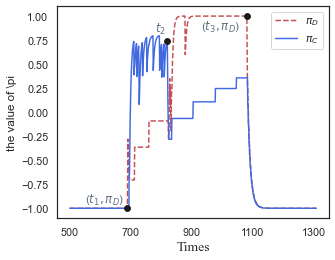

In [100]:
plt.figure(figsize=(5,4), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
sns.set_style('white')
ax1=plt.subplot(1,1,1)
agent=Agent_N[14]
steps=1310
t1=689
t2=819
t3=1081
ax1.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
ax1.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
ax1.set_xticks(list(range(steps-500))[::200])
ax1.set_xticklabels(list(range(500,steps))[::200])
ax1.plot(t1-500,agent.q0_his[t1],'ko')#color='#52b788',marker='o')
ax1.plot(t2-500,agent.q0_his[t2],'ko')#color='#52b788',marker='o')
ax1.plot(t3-500,agent.q1_his[t3],'ko')#color='#52b788',marker='o')

ax1.set_ylabel('the value of \pi')
ax1.text(550-500,-0.95,'($t_1,\pi_D$)',color='#637081')
ax1.text(780-500,0.83,'$t_2$',color='#637081')
ax1.text(930-500,0.85,'($t_3,\pi_D$)',color='#637081')
ax1.set_xlabel('Times',font)
#ax1.annotate('the step increase \n due to exploration', xy=(850-500,-0.3), xytext=(780-500, -0.96),
        #      arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))


plt.legend()
plt.savefig('s4-agent24.pdf')

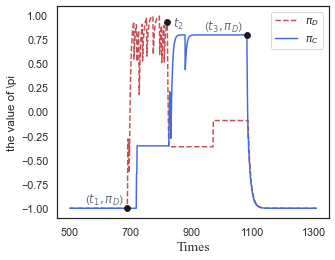

In [101]:
plt.figure(figsize=(5,4), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
sns.set_style('white')
ax1=plt.subplot(1,1,1)
agent=Agent_N[23]
steps=1310
t1=689
t2=819
t3=1081
ax1.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
ax1.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
ax1.set_xticks(list(range(steps-500))[::200])
ax1.set_xticklabels(list(range(500,steps))[::200])
ax1.plot(t1-500,agent.q1_his[t1],'ko')#color='#52b788',marker='o')
ax1.plot(t2-500,agent.q1_his[t2],'ko')#color='#52b788',marker='o')
ax1.plot(t3-500,agent.q0_his[t3],'ko')#color='#52b788',marker='o')

ax1.set_ylabel('the value of \pi')
ax1.text(550-500,-0.95,'($t_1,\pi_D$)',color='#637081')
ax1.text(840-500,0.88,'$t_2$',color='#637081')
ax1.text(940-500,0.85,'($t_3,\pi_D$)',color='#637081')
ax1.set_xlabel('Times',font)
#ax1.annotate('the step increase \n due to exploration', xy=(850-500,-0.3), xytext=(780-500, -0.96),
        #      arrowprops=dict(arrowstyle="->", color='grey' ,linestyle='-.', hatch='*'))


plt.legend()
plt.savefig('s5-agent24.pdf')

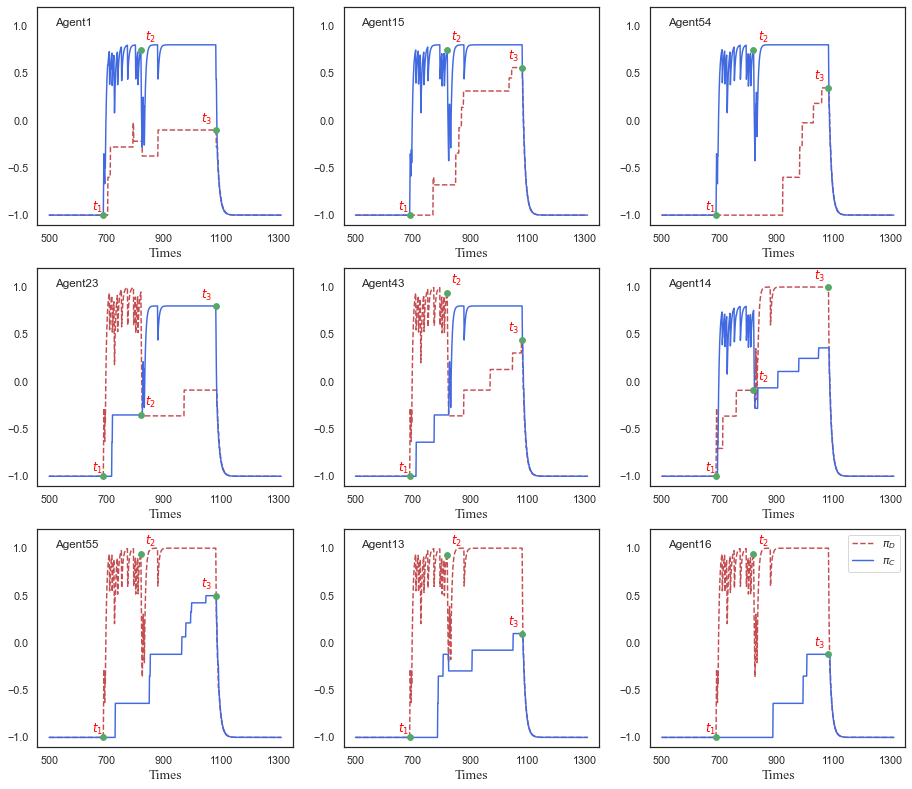

In [179]:
plt.figure(figsize=(16,14), dpi=70)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14,
        }
fig_agent=[1,15,54,23,43,14,55,13,16]
steps=1310
t1=689
t2=819
t3=1081
sns.set_style('white')
for i in range(9):
    index=fig_agent[i]
    agent=Agent_N[index]
    i=i+1
    ax=plt.subplot(3,3,i)
    
    ax.plot(agent.q1_his[500:steps],'r--',label='$\pi_D$')
    ax.plot(agent.q0_his[500:steps],'royalblue',label='$\pi_C$') 
    ax.set_xticks(list(range(steps-500))[::200])
    ax.set_xticklabels(list(range(500,steps))[::200])

       
    ax.plot(t1-500,agent.q0_his[t1],'go')#color='#52b788',marker='o')
    ax.text(650-500,-0.95,'$t_1$',color='red')
    if i in [1,2,3,4]:
        ax.plot(t2-500,agent.q0_his[t2],'go')#color='#52b788',marker='o')
        ax.text(t2-500+15,agent.q0_his[t2]+0.1,'$t_2$',color='red')
    else:
        ax.plot(t2-500,agent.q1_his[t2],'go')#color='#52b788',marker='o')
        ax.text(t2-500+15,agent.q1_his[t2]+0.1,'$t_2$',color='red')
    if i in [4,7,8,9]:
        ax.plot(t3-500,agent.q0_his[t3],'go')#color='#52b788',marker='o')
        ax.text(t3-500-50,agent.q0_his[t3]+0.08,'$t_3$',color='red')
    else:
        ax.plot(t3-500,agent.q1_his[t3],'go')#color='#52b788',marker='o')
        ax.text(t3-500-50,agent.q1_his[t3]+0.08,'$t_3$',color='red')
    
    
    

    
    
    ax.text(520-500,1,'Agent{}'.format(index))
    ax.set_xlabel('Times',font)
    ax.set_ylim(-1.1,1.2)



plt.legend()

plt.savefig('D:\\jupyter\\code\\paper-experiment\\si\\s7-Q_SDE.pdf')

In [29]:
abs_c=[]
abs_d=[]
num=[]
i=0
for agent in Agent_N:
    
    delta_q=agent.q0_his[819]-agent.q1_his[819]
    if delta_q>=0:
        item=(i,delta_q)
        abs_c.append(item)
    else:
        item=(i,-1*delta_q)
        abs_d.append(item)
  
    i+=1
abs_c.sort(key=lambda x:x[1])
abs_d.sort(key=lambda x:x[1])
print(abs_c)


[(45, 0.546521), (57, 0.561053), (48, 0.765849), (27, 0.765856), (14, 0.833113), (31, 0.868628), (1, 0.962748), (59, 1.019401), (34, 1.021424), (11, 1.021856), (29, 1.021856), (40, 1.021856), (58, 1.021856), (3, 1.0858560000000002), (50, 1.0858560000000002), (44, 1.341853), (51, 1.341853), (2, 1.341856), (8, 1.341856), (10, 1.341856), (12, 1.341856), (21, 1.341856), (39, 1.341856), (49, 1.341856), (53, 1.341856), (47, 1.421856), (15, 1.421872), (36, 1.429529), (20, 1.4295339999999999), (0, 1.540647), (5, 1.741856), (7, 1.741856), (9, 1.741856), (18, 1.741856), (19, 1.741856), (22, 1.741856), (28, 1.741856), (38, 1.741856), (41, 1.741856), (42, 1.741856), (54, 1.741856), (35, 1.741872), (4, 1.7877200000000002)]


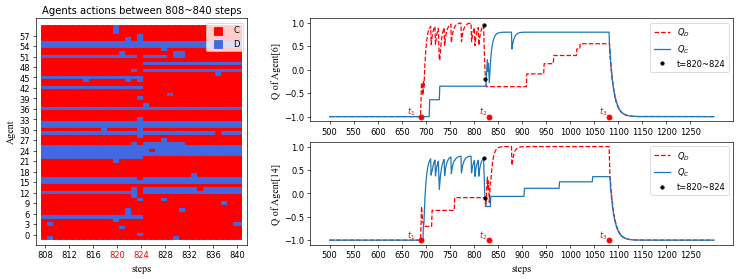

In [59]:

import matplotlib.gridspec

fig= plt.subplots(1, 1, figsize=(15,5), dpi=60)
gs = matplotlib.gridspec.GridSpec(2, 2, 
                                  width_ratios=[1, 2],
                                  height_ratios=[1,1]) 
ax0 = plt.subplot(gs[:,0])
action_dict={0:'red',1:'royalblue'}

for i in range(N):
    for j in range(33):
        if Agent_N[i].action_history[808+j]==0:
            s1=ax0.scatter(j,i,color='red',marker='s',s=80)
        else:
            s2=ax0.scatter(j,i,color='royalblue',marker='s',s=80)

ax0.set_xlabel('steps',font)
ax0.set_ylabel('Agent',font)
ax0.set_xticks(list(range(33))[::4])
ax0.set_xticklabels(list(range(808,841))[::4])
ax=plt.gca()
for n, tl in enumerate(ax.xaxis.get_ticklabels()):
    if n  in [3,4]:
        tl.set_color('red')

ax0.set_yticks(list(range(N))[::3])
ax0.set_title('Agents actions between 808~840 steps')

steps=1300
plt.legend((s1,s2),('C','D') ,loc = 'best')
ax1 = plt.subplot(gs[0,1])
agent=Agent_N[6]

ax1.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
ax1.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
ax1.set_xticks(list(range(800))[::50])
ax1.set_xticklabels(list(range(500,1300))[::50])
ax1.plot(689-500,-1,'ro')
ax1.plot(1081-500,-1,'ro')
ax1.plot(832-500,-1,'ro')
ax1.plot(820-500,agent.q1_his[820],'ko',markersize=4)
ax1.plot(824-500,agent.q1_his[824],'ko',markersize=4,label='t=820~824')
ax1.text(160,-0.95,'$t_1$',color='red')
ax1.text(310,-0.95,'$t_2$',color='red')
ax1.text(560,-0.95,'$t_3$',color='red')
ax1.set_xlabel('steps',font)
ax1.set_ylabel('Q of Agent[6]',font)
plt.legend()

ax2 = plt.subplot(gs[1,1])
agent=Agent_N[14]

ax2.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
ax2.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
ax2.set_xticks(list(range(800))[::50])
ax2.set_xticklabels(list(range(500,1300))[::50])
ax2.plot(689-500,-1,'ro')
ax2.plot(1081-500,-1,'ro')
ax2.plot(832-500,-1,'ro')
ax2.text(160,-0.95,'$t_1$',color='red')
ax2.text(310,-0.95,'$t_2$',color='red')
ax2.text(560,-0.95,'$t_3$',color='red')
ax2.plot(820-500,agent.q0_his[820],'ko',markersize=4)
ax2.plot(824-500,agent.q0_his[824],'ko',markersize=4,label='t=820~824')
ax2.set_xlabel('steps',font)
ax2.set_ylabel('Q of Agent[14]',font)
plt.legend()
plt.savefig('fig6.pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


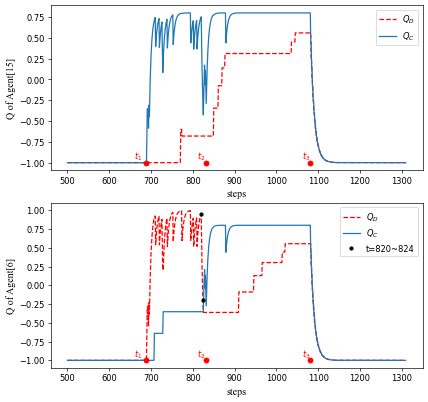

In [85]:
plt.figure(figsize=(8,8), dpi=60)
plt.subplot(2,1,1)
steps=1310
agent=Agent_N[15]

#plt.subplot(1,2,1)
plt.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
plt.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
#plt.plot(abs(np.array(agent.q0_his[:steps])-np.array(agent.q1_his[:steps])),'g-.',linewidth=1,label='$\Delta Q$') 
plt.xticks(list(range(810))[::100],list(range(500,1310))[::100])

plt.plot(689-500,-1,'ro')
plt.plot(1081-500,-1,'ro')
plt.plot(832-500,-1,'ro')
plt.text(160,-0.95,'$t_1$',color='red')
plt.text(310,-0.95,'$t_2$',color='red')
plt.text(560,-0.95,'$t_3$',color='red')
plt.xlabel('steps',font)
plt.ylabel('Q of Agent[15]',font)
plt.legend()
plt.subplot(2,1,2)

agent=Agent_N[6]
plt.plot(agent.q1_his[500:steps],'r--',label='$Q_D$')
plt.plot(agent.q0_his[500:steps],color='#1f77b4',label='$Q_C$') 
plt.xticks(list(range(810))[::100],list(range(500,1310))[::100])

plt.plot(689-500,-1,'ro')
plt.plot(1081-500,-1,'ro')
plt.plot(832-500,-1,'ro')
plt.plot(820-500,agent.q1_his[820],'ko',markersize=4)
plt.plot(824-500,agent.q1_his[824],'ko',markersize=4,label='t=820~824')
plt.text(160,-0.95,'$t_1$',color='red')
plt.text(310,-0.95,'$t_2$',color='red')
plt.text(560,-0.95,'$t_3$',color='red')
plt.xlabel('steps',font)
plt.ylabel('Q of Agent[6]',font)
plt.savefig('agent615.eps')

plt.legend()
plt.show()


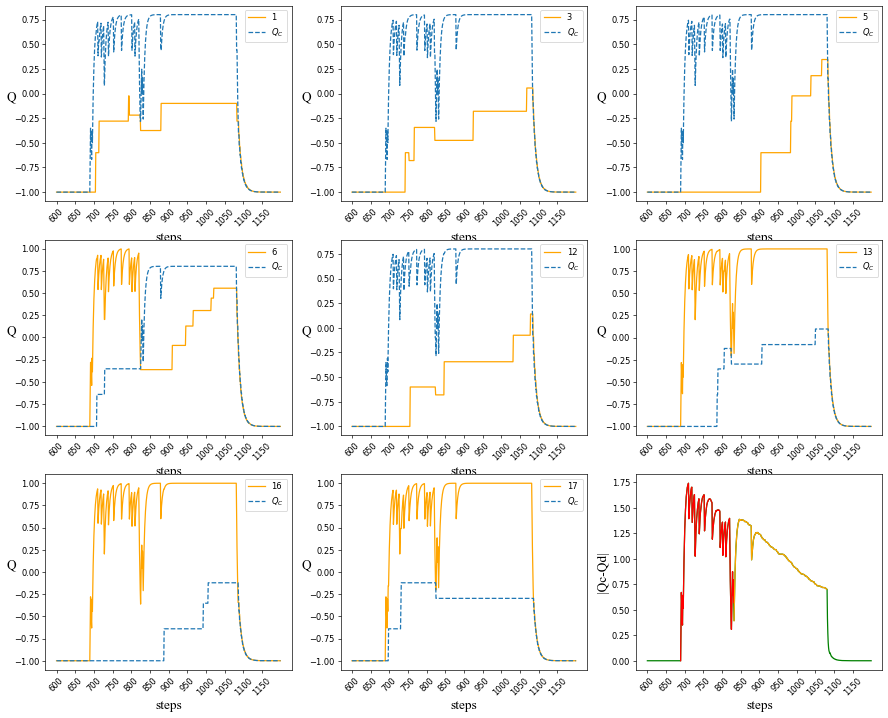

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,25), dpi=60)

steps=1200

plt.subplot(5,3,1)
agent=Agent_N[1]
plt.plot(agent.q1_his[600:steps],'orange',label='1')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)

plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,2)
agent=Agent_N[3]
plt.plot(agent.q1_his[600:steps],'orange',label='3')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,3)
agent=Agent_N[5]
plt.plot(agent.q1_his[600:steps],'orange',label='5')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,4)
agent=Agent_N[6]
plt.plot(agent.q1_his[600:steps],'orange',label='6')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,5)
agent=Agent_N[12]
plt.plot(agent.q1_his[600:steps],'orange',label='12')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,6)
agent=Agent_N[13]
plt.plot(agent.q1_his[600:steps],'orange',label='13')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,7)
agent=Agent_N[16]
plt.plot(agent.q1_his[600:steps],'orange',label='16')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,8)
agent=Agent_N[17]
plt.plot(agent.q1_his[600:steps],'orange',label='17')
plt.plot(agent.q0_his[600:steps],color='#1f77b4',linestyle='--',label='$Q_C$') 
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()

plt.subplot(5,3,9)

abs_q=0
for agent in Agent_N:
    abs_q+=abs(np.array(agent.q0_his)-np.array(agent.q1_his))
abs_q=abs_q/N
    
plt.plot(list(range(600)),abs_q[600:steps],'g')
plt.plot(list(range(689-600,832-600)),abs_q[689:832],'r')
plt.plot(list(range(832-600,1081-600)),abs_q[832:1081],'orange')
#plt.plot(list(range(1672,2008)),abs_q[1672:2008],'r')
#plt.plot(list(range(2008,2540)),abs_q[2008:2540],'orange')
#plt.plot(list(range(2556,2750)),abs_q[2556:2750],'r')
plt.xticks(list(range(600))[::50],list(range(600,1200))[::50],rotation=45)
plt.xlabel('steps',font)
plt.ylabel('|Qc-Qd|',font)

plt.show()

In [ ]:
'''
cha=np.array(agent.q0_his[:steps])-np.array(agent.q1_his[:steps])
plt.plot(cha)
plt.plot(list(range(689,832)),cha[689:832],'r','--')
plt.plot(list(range(832,1081)),cha[832:1081],'orange')
plt.plot(list(range(1672,2008)),cha[1672:2008],'r')
plt.plot(list(range(2008,2540)),cha[2008:2540],'orange')
plt.plot(list(range(2556,2750)),cha[2556:2750],'orange')
plt.xlabel('steps',font)
plt.ylabel('|Qc-Qd|',font)
plt.xticks(list(range(steps))[::100],rotation=45)
plt.plot(2362,cha[2362],'go')
plt.plot(2750,cha[2750],'go')
plt.plot(832,cha[832],'go')
plt.plot(1672,cha[1672],'go')
plt.plot(2008,cha[2008],'go')
plt.plot(2540,cha[2540],'go')'''

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


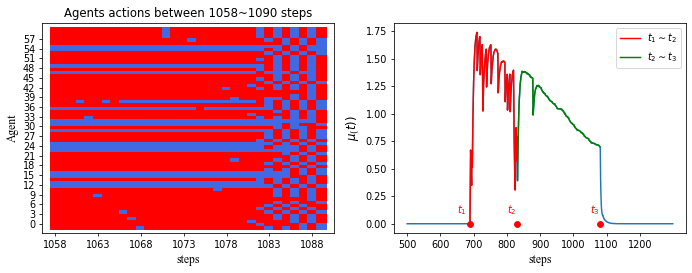

In [20]:
plt.figure(figsize=(10,4), dpi=70)
plt.subplot(1,2,2)
steps=1300
abs_q=0
for agent in Agent_N:
    abs_q+=abs(np.array(agent.q0_his)-np.array(agent.q1_his))
abs_q=abs_q/N    
plt.plot(list(range(800)),abs_q[500:steps])
plt.plot(list(range(689-500,832-500)),abs_q[689:832],'r',label='$t_{1} \sim t_{2}$')
plt.plot(list(range(832-500,1081-500)),abs_q[832:1081],'g',label='$t_{2} \sim t_{3}$')

plt.plot(689-500,0,'ro')
plt.plot(1081-500,0,'ro')
plt.plot(832-500,0,'ro')
plt.text(150,0.1,'$t_1$',color='red')
plt.text(300,0.1,'$t_2$',color='red')
plt.text(550,0.1,'$t_3$',color='red')
plt.xticks(list(range(800))[::100],list(range(500,1300))[::100])
plt.legend()
plt.xlabel('steps',font)
plt.ylabel('$\mu_(t))$',font)

plt.subplot(1,2,1)
action_dict={0:'red',1:'royalblue'}

for i in range(N):
    for j in range(32):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1058+j]],marker='s',s=100)

plt.xlabel('steps',font)
plt.ylabel('Agent',font)
plt.xticks(list(range(32))[::5],list(range(1058,1090))[::5])
plt.yticks(list(range(60))[::3])
plt.title('Agents actions between 1058~1090 steps')
plt.tight_layout()

plt.savefig('anti-ability.eps')
plt.show()

In [227]:
abs_list=[]
for t in range(total_round):
    abs_q=0
    for agent in Agent_N:
        abs_q+=abs(agent.q0_his[t]-agent.q1_his[t])
    abs_list.append(abs_q/N)

q_df=pd.Series(abs_list)
state=[]
for k in env.r_list:
    if  k>0:
        state.append(1)
    else:
        state.append(0)
state_df=pd.Series(state)   
df=pd.concat([q_df,state_df],axis=1)
df.columns=['q','state']

df.to_csv('q_state_1.csv',header=None)

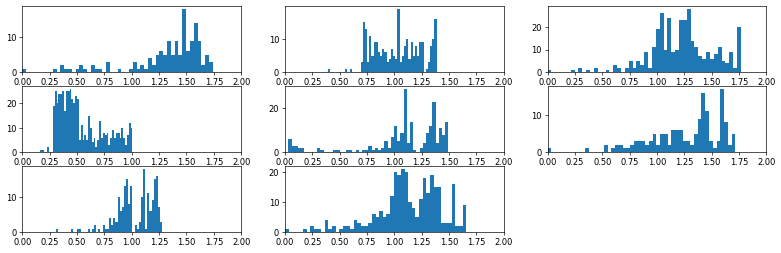

In [238]:
# 某一时刻累加所有的agent的abs q值
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5), dpi=60)
plt.subplot(3,3,1)
plt.hist(df[689:831].q,bins=50)
plt.xlim(0,2)
#ax1.set_xlim(0,0.1)
plt.subplot(3,3,2)
plt.hist(df[831:1081].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,3)
plt.hist(df[1672:2008].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,4)
plt.hist(df[2008:2540].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,5)
plt.hist(df[2540:2750].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,6)
plt.hist(df[4398:4550].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,7)
plt.hist(df[4550:4750].q,bins=50)
plt.xlim(0,2)
plt.subplot(3,3,8)
plt.hist(df[5385:5691].q,bins=50)
plt.xlim(0,2)
plt.show()

### t时刻agent的q值差分布

In [135]:
t=1080
q_abs=[]
for agent in Agent_N:
    q_abs.append(abs(agent.q0_his[t]-agent.q1_his[t]))
q_df=pd.Series(q_abs)
q_df.sort_values()

59    0.038905
27    0.109455
46    0.112320
40    0.173290
39    0.192446
49    0.219427
15    0.240399
6     0.246159
34    0.262472
44    0.324284
52    0.328828
43    0.357700
58    0.383267
29    0.430453
45    0.437072
54    0.455356
5     0.455356
7     0.455356
38    0.455356
28    0.455356
20    0.488124
55    0.501987
0     0.535311
50    0.601543
18    0.619196
14    0.643092
36    0.660156
12    0.660156
47    0.660156
4     0.660156
8     0.692924
53    0.719139
3     0.744124
11    0.785084
26    0.789820
30    0.789820
10    0.823996
51    0.823996
2     0.823996
21    0.823996
35    0.823996
31    0.849084
23    0.889258
48    0.892333
1     0.900284
13    0.902256
37    0.937276
57    1.044284
41    1.079996
19    1.079996
22    1.079996
25    1.121596
32    1.121596
56    1.121596
16    1.121596
17    1.297276
24    1.351996
9     1.399996
42    1.399996
33    1.639996
dtype: float64

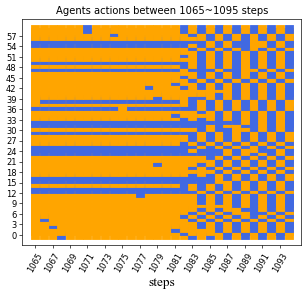

In [122]:
fig= plt.subplots(1, 1, figsize=(6,5), dpi=60)
action_dict={0:'red',1:'royalblue'}

for i in range(N):
    for j in range(30):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[1065+j]],marker='s',s=100)

plt.xlabel('steps',font)
#plt.ylabel('Agent',font)
plt.xticks(list(range(30))[::2],list(range(1065,1095))[::2],rotation=60)
plt.yticks(list(range(60))[::3])
plt.title('Agents actions between 1065~1095 steps')
plt.show()

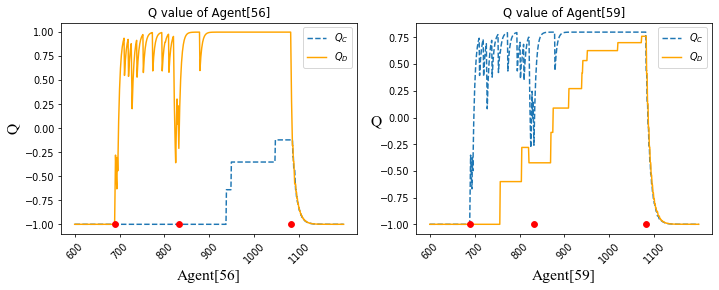

In [145]:
plt.figure( figsize=(12,4), dpi=70)

plt.subplot(1,2,1)
plt.plot(Agent_N[56].q0_his[600:1200],color='#1f77b4',linestyle='--',label='$Q_C$')
plt.plot(Agent_N[56].q1_his[600:1200],'orange',label='$Q_D$') 

plt.xticks(list(range(600))[::100],list(range(600,1200))[::100],rotation=45)
plt.xlabel('Agent[56]',font)
plt.ylabel('Q',font)
plt.plot(689-600,-1,'ro')
plt.plot(1081-600,-1,'ro')
plt.plot(832-600,-1,'ro')
plt.title('Q value of Agent[56]')
plt.legend(loc=1)
plt.subplot(1,2,2)
plt.plot(Agent_N[59].q0_his[600:1200],color='#1f77b4',linestyle='--',label='$Q_C$')
plt.plot(Agent_N[59].q1_his[600:1200],'orange',label='$Q_D$') 
plt.xticks(list(range(600))[::100],list(range(600,1200))[::100],rotation=45)
plt.xlabel('Agent[59]',font)
plt.ylabel('Q',font,rotation=0)

plt.plot(689-600,-1,'ro')
plt.plot(1081-600,-1,'ro')
plt.plot(832-600,-1,'ro')
plt.title('Q value of Agent[59]')
plt.legend()
''' 
plt.subplot(4,1,3)

plt.plot(Agent_N[14].q0_his[600:1200],'red',linestyle='-.',label='Qc')
plt.plot(Agent_N[14].q1_his[600:1200],'g--',label='agent14_Qd') 
plt.xticks(list(range(600))[::100],list(range(600,1200))[::100],rotation=45)

plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend()
plt.subplot(4,1,4)

plt.plot(Agent_N[23].q0_his[600:1200],'red',linestyle='-.',label='Qc')
plt.plot(Agent_N[23].q1_his[600:1200],'g--',label='agent0_Qd') 
plt.xticks(list(range(600))[::100],list(range(600,1200))[::100],rotation=45)

plt.xlabel('steps',font)
plt.ylabel('Q',font,rotation=0)
plt.legend(loc=2)'''
plt.show()

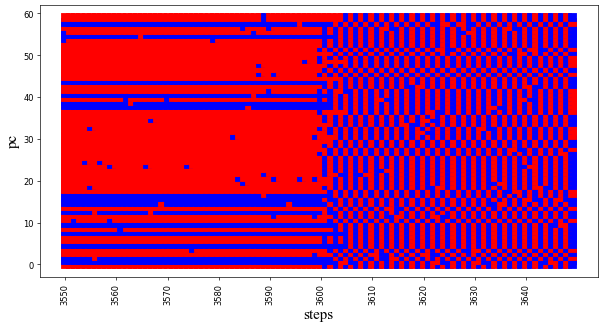

In [67]:
fig= plt.subplots(1, 1, figsize=(12,6), dpi=60)
action_dict={0:'red',1:'blue'}

for i in range(N):
    for j in range(100):
        plt.scatter(j,i,color=action_dict[Agent_N[i].action_history[810+j]],marker='s',s=80)

plt.xlabel('steps',font)
plt.ylabel('pc',font)
plt.xticks(list(range(100))[::10],list(range(3550,3650))[::10],rotation=90)
plt.show()

### 输出整体env值

In [49]:
agent6_q0=pd.Series(Agent_N[6].q0_his)
agent6_q1=pd.Series(Agent_N[6].q1_his)
agent6_action=pd.Series(Agent_N[6].action_history)
agent23_q0=pd.Series(Agent_N[23].q0_his)
agent23_q1=pd.Series(Agent_N[23].q1_his)
agent23_action=pd.Series(Agent_N[23].action_history)
agent43_q0=pd.Series(Agent_N[43].q0_his)
agent43_q1=pd.Series(Agent_N[43].q1_his)
agent43_action=pd.Series(Agent_N[43].action_history)
agent46_q0=pd.Series(Agent_N[46].q0_his)
agent46_q1=pd.Series(Agent_N[46].q1_his)
agent46_action=pd.Series(Agent_N[46].action_history)
agent50_q0=pd.Series(Agent_N[50].q0_his)
agent50_q1=pd.Series(Agent_N[50].q1_his)
agent50_action=pd.Series(Agent_N[50].action_history)
agent52_q0=pd.Series(Agent_N[52].q0_his)
agent52_q1=pd.Series(Agent_N[52].q1_his)
agent52_action=pd.Series(Agent_N[52].action_history)
agent14_q0=pd.Series(Agent_N[14].q0_his)
agent14_q1=pd.Series(Agent_N[14].q1_his)
agent14_action=pd.Series(Agent_N[14].action_history)
agent48_q0=pd.Series(Agent_N[48].q0_his)
agent48_q1=pd.Series(Agent_N[48].q1_his)
agent48_action=pd.Series(Agent_N[48].action_history)
agent_q_df=pd.concat([agent6_q0,agent6_q1,agent6_action,
                      agent23_q0,agent23_q1,agent23_action,
                      agent43_q0,agent43_q1,agent43_action,
                      agent50_q0,agent50_q1,agent50_action,
                      agent52_q0,agent52_q1,agent52_action,
                      agent14_q0,agent14_q1,agent14_action,
                      agent48_q0,agent48_q1,agent48_action],
                     
                     axis=1)
agent_q_df.columns= ['6c','6d','6a',
                 '23c','23d','23a',
                  '43c','43d','43a',
                                '50c','50d','50a',
                     '52c','52d','52a',
                                '14c','14d','14a',
                               '48c','48d','48a']

agent_q_df.to_csv('agen_q.csv',header=True)


In [64]:
agent_q0=pd.Series(Agent_N[1].q0_his)
agent_q1=pd.Series(Agent_N[1].q1_his)
agent_action=pd.Series(Agent_N[1].action_history)
agent_q_df=pd.concat([agent_q0,agent_q1,agent_action],axis=1)
agent_q_df.to_csv('agent1——q.csv',header=None)

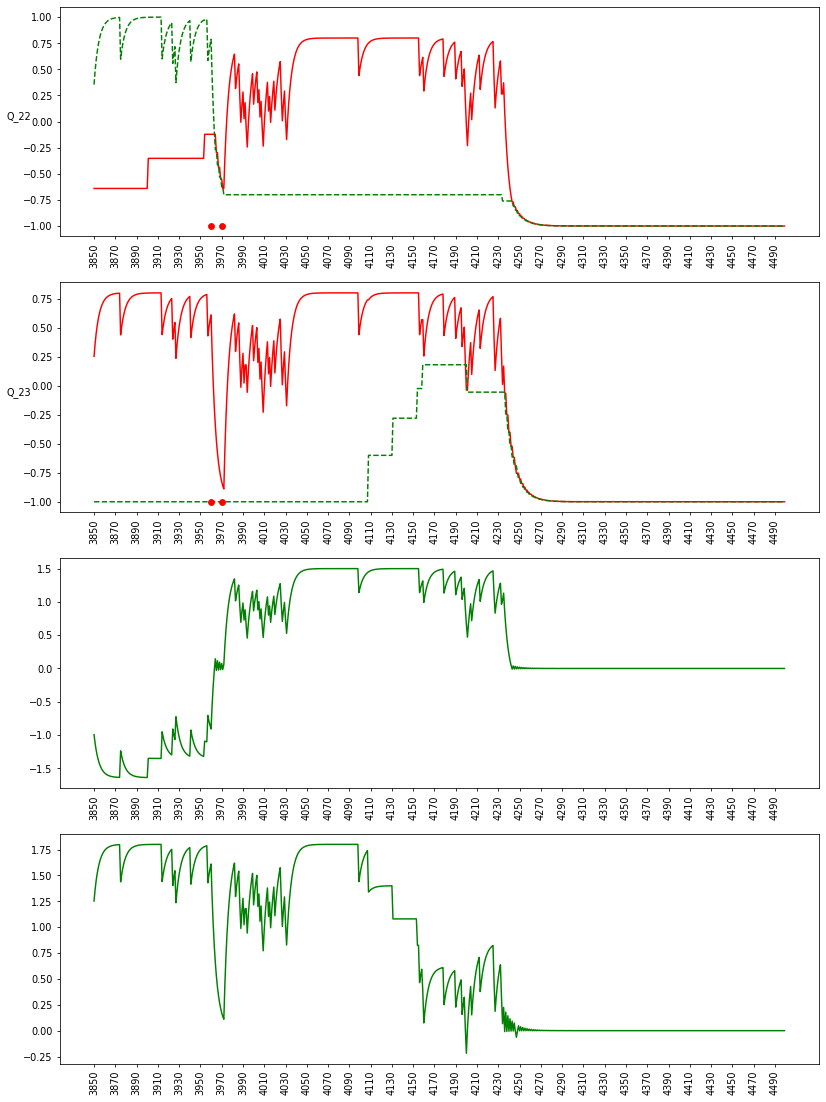

In [278]:
fig= plt.figure( figsize=(14,20), dpi=70)
ax1=fig.add_subplot(4,1,1)
ax2=fig.add_subplot(4,1,2)
ax3=fig.add_subplot(4,1,3)
#ax3=fig.add_subplot(4,1,3)
ax4=fig.add_subplot(4,1,4)
ax1.plot(Agent_N[22].q0_his[3850:4500],'r-')
ax1.plot(Agent_N[22].q1_his[3850:4500],'g--') 
ax1.set_xticks(list(range(650))[::20])
ax1.set_xticklabels(list(range(3850,4500))[::20],rotation=90)
ax1.set_ylabel('Q_22',rotation=0)
ax1.plot(3960-3850,-1,'ro')
ax1.plot(3970-3850,-1,'ro')



ax2.plot(Agent_N[23].q0_his[3850:4500],'r-')
ax2.plot(Agent_N[23].q1_his[3850:4500],'g--') 
ax2.set_xticks(list(range(650))[::20])
ax2.set_xticklabels(list(range(3850,4500))[::20],rotation=90)
ax2.set_ylabel('Q_23',rotation=0)
ax2.plot(3960-3850,-1,'ro')
ax2.plot(3970-3850,-1,'ro')

ax3.plot(np.array(Agent_N[22].q0_his[3850:4500])-np.array(Agent_N[22].q1_his[3850:4500]),'g-')
ax3.set_xticks(list(range(650))[::20])
ax3.set_xticklabels(list(range(3850,4500))[::20],rotation=90) 
ax4.plot(np.array(Agent_N[23].q0_his[3850:4500])-np.array(Agent_N[23].q1_his[3850:4500]),'g-')
ax4.set_xticks(list(range(650))[::20])
ax4.set_xticklabels(list(range(3850,4500))[::20],rotation=90) 

plt.show()

In [152]:

def C(n,k):   #求n中选出k的组合值
    res = 1
    for i in range(k):
        res *= n / k
        k -= 1
        n -= 1
    return res

Ntbiao=dict()
for N in range(10,60):
    Ntbiao[N]=[]

for N in range(10,60):
    fenmu=pow(2,N)
    for t in range(50,90):
        TT=int(t/100.*N)
        sum=0
        for k in range(TT,N):
            sum+=C(N,k)
        
        Ntbiao[N].append(sum/fenmu) 
df=pd.DataFrame(Ntbiao).T

df.columns=np.arange(0.5,0.9,0.01)
df.head()
df.to_csv('ntbiao.csv')

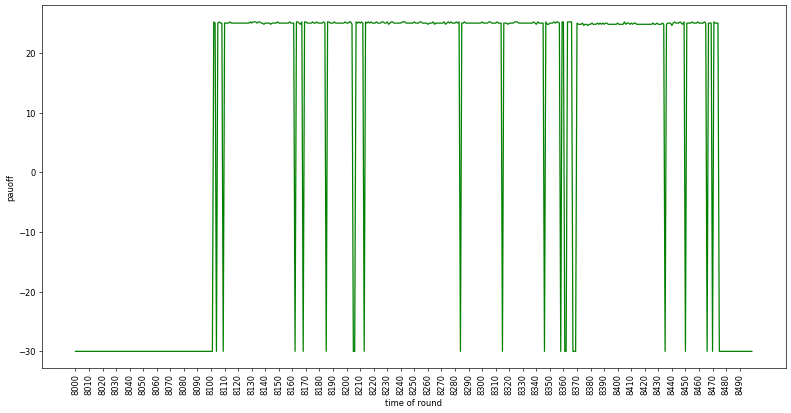

In [200]:
fig= plt.subplots(1, 1, figsize=(16, 8), dpi=60)

plt.plot(list(range(8000,8500)), env.r_list[8000:8500],'g')
plt.xlabel('time of round')
plt.ylabel('pauoff')
plt.xticks(list(range(8000,8500))[::10],rotation=90)
plt.show()

In [54]:
q0_874=[]
q1_874=[]
for i in range(30):
    q0_874.append(Agent_N[i].q0_his[874])
    q1_874.append(Agent_N[i].q1_his[874])
df874_q0=pd.Series(q0_874)
df874_q1=pd.Series(q1_874)
df874_q_df=pd.concat([df875_q0,df875_q1],axis=1)
df874_q_df.columns=['c','d']
df874_q_df.to_csv('874_q.csv')

In [56]:
df874_q_df[df874_q_df.c>df874_q_df.d].count()

c    23
d    23
dtype: int64

In [60]:
env.pc_pro[875]

0.7

In [46]:
q0_875=[]
q1_875=[]
for i in range(30):
    q0_875.append(Agent_N[i].q0_his[875])
    q1_875.append(Agent_N[i].q1_his[875])
df875_q0=pd.Series(q0_875)
df875_q1=pd.Series(q1_875)
df875_q_df=pd.concat([df875_q0,df875_q1],axis=1)
df875_q_df.columns=['c','d']
df875_q_df.to_csv('875_q.csv')

In [48]:
df875_q_df[df875_q_df.c>df875_q_df.d].count()

c    23
d    23
dtype: int64

In [52]:
q0_876=[]
q1_876=[]
for i in range(30):
    q0_876.append(Agent_N[i].q0_his[876])
    q1_876.append(Agent_N[i].q1_his[876])
df876_q0=pd.Series(q0_876)
df876_q1=pd.Series(q1_876)
df876_q_df=pd.concat([df876_q0,df876_q1],axis=1)
df876_q_df.columns=['c','d']
df876_q_df.to_csv('876_q.csv',header=None)

In [53]:
df876_q_df[df876_q_df.c>df876_q_df.d].count()

c    18
d    18
dtype: int64

In [36]:
import pandas as pd
df=pd.concat([pd.Series(Agent_N[5].q0_his[:300]),pd.Series(Agent_N[5].q1_his[:300])],axis=1)
df.iloc[105:130]

,0,1
105,-0.996242,-0.995825
106,-0.996242,-0.996242
107,-0.996242,-0.996618
108,-0.996618,-0.996618
109,-0.996956,-0.996618
110,-0.996956,-0.996956
111,-0.996956,-0.997260
112,-0.997260,-0.997260
113,-0.997260,-0.997534
114,-0.997534,-0.997534
